# TASK-2 Social Media Sentiment Analysis
Analyze social media data (e.g., Twitter) to understand public sentiment
towards specific topics, products, or events. Use natural language
processing (NLP) techniques to preprocess text data, extract sentiment
scores, and visualize sentiment trends over time.

In [23]:
#Import the Necessary Dependencies
!pip install textblob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
# TextBlob is primarily used for simple and quick natural language processing (NLP) tasks,particularly sentiment analysis,
# where it allows you to easily determine the positive or negative sentiment of a given piece of text.

In [13]:
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#Load the dataset
df = pd.read_csv("C:\\Users\\seepa\\Datasets\\twitter_training.csv")

In [15]:
# Display first few rows to understand the dataset
print(df.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [16]:
#Check column names
print(df.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [17]:
# Assume the review text is in the last column; rename it for clarity
df.rename(columns={df.columns[-1]: 'review_text'}, inplace=True)

In [18]:
#length of th data
print('length of data is', len(df))

length of data is 74681


In [19]:
#Shape of data
df. shape

(74681, 4)

In [20]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   2401         74681 non-null  int64 
 1   Borderlands  74681 non-null  object
 2   Positive     74681 non-null  object
 3   review_text  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [37]:
df.dtypes

2401                 int64
Borderlands         object
Positive            object
review_text         object
sentiment_score    float64
sentiment           object
dtype: object

In [24]:
#Checking for null values
np.sum(df.isnull().any(axis=1))

686

In [26]:
print(df.isnull().sum())

2401             0
Borderlands      0
Positive         0
review_text    686
dtype: int64


In [27]:
df_cleaned = df.dropna()
print(f"Rows after dropping null values: {len(df_cleaned)}")

Rows after dropping null values: 73995


In [28]:
df['review_text'].fillna("No review provided", inplace=True)

In [30]:
#Sentiment Analysis Function
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Convert to string
    return analysis.sentiment.polarity  # Returns value between -1 to 1

In [31]:
#Apply Sentiment Analysis
df['sentiment_score'] = df['review_text'].apply(get_sentiment)


In [32]:
#Categorize Sentiments
def categorize_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['sentiment_score'].apply(categorize_sentiment)

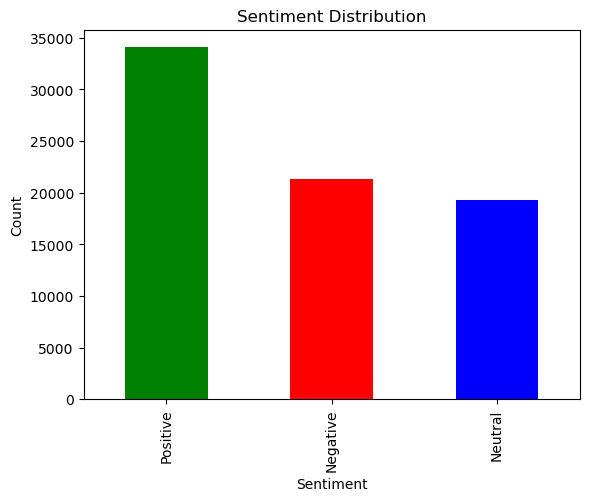

In [33]:
#Visualize Sentiment Distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()